# Train

## 구글 드라이브 마운트

In [1]:
from google.colab import drive
isMount=!df |grep /content/drive
if len(isMount) < 1 : drive.mount('/content/drive', force_remount=False)


Mounted at /content/drive


## 데이터 위치지정

In [2]:
# Data file 
url = 'https://public.roboflow.com/ds/eL4QUdkpSR?key=0ikL5WLM1w'

# Data file Path
dPath=dPath='/content/drive/MyDrive/_code/ObjectDetection/data/yolov5_mask'  

# Working folder Path
wPath='/content/drive/MyDrive/_code/ObjectDetection/yolov5'


## Yolov5 환경 설정

- yolo 가 깔린 폴더로 이동

In [3]:
%cd {wPath}

/content/drive/MyDrive/_code/ObjectDetection/yolov5


- requirements.txt 파일로 필요라이브러리 설치

In [4]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 4.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## 데이터셋 다운로드

- dPath 생성

In [ ]:
!mkdir {dPath}

- roboflow 데이터셋 다운로드

In [ ]:
%cd {dPath}
!curl -L "{url}" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip 

/content/drive/MyDrive/_code/ObjectDetection/data/yolov5_mask
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1882      0 --:--:-- --:--:-- --:--:--  1878
100 18.5M  100 18.5M    0     0  17.6M      0  0:00:01  0:00:01 --:--:-- 17.6M
Archive:  roboflow.zip
 extracting: test/images/1288126-10255706714jpg_jpg.rf.ed230c79fdbb1fa0650ff4fd32f620ee.jpg  
 extracting: test/images/shutterstock_1627199179_jpg.rf.350e69105dd1458572a590c3e3ef2538.jpg  
 extracting: test/images/15391513324714o1n0r10n6_jpg.rf.eb6b6b796ad74b0c9d75011d1020f0af.jpg  
 extracting: train/images/1125506397_15801322206131n_jpg.rf.0a60284a71b2d0ed77c002e768b39b00.jpg  
 extracting: test/images/1579924271_jpg.rf.1fea0f43731fbea2876f63135256004f.jpg  
 extracting: train/images/1_R_kFK9pNLfKAuopY_lAaPQ_jpeg.rf.030922effaedbead963acea666441dbd.jpg  
 extracting: test/images/1224331650_

## Train 실행

- yolov5 폴더 이동

In [5]:
%cd {wPath}

/content/drive/MyDrive/_code/ObjectDetection/yolov5


- train 파일을 임포트하여 훈련

In [ ]:
import train
datapath = dPath+'/data.yaml'
train.run(data=datapath, imgsz=416, batch=16, epochs=50, weights='models/yolov5s.pt', name="masks")

train: weights=models/yolov5s.pt, cfg=, data=/content/drive/MyDrive/_code/ObjectDetection/data/yolov5_mask/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=masks, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, batch=16


github: ⚠️ YOLOv5 is out of date by 13 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 v6.0-102-gf17c86b torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0



requirements: 1 package updated per /content/drive/MyDrive/_code/ObjectDetection/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5 🚀 runs (RECOMMENDED)


TensorBoard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=2

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7            

Optimizer stripped from runs/train/masks/weights/last.pt, 14.3MB



Validating runs/train/masks/weights/best.pt...


Optimizer stripped from runs/train/masks/weights/best.pt, 14.3MB


Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        149        954      0.303      0.825       0.52      0.301
                mask        149        806      0.431       0.96      0.883      0.521
             no-mask        149        148      0.176      0.689      0.156     0.0805
Results saved to runs/train/masks


# Detect

## 세팅

- torch 모델을 읽기 위해 import

In [6]:
import torch

## path 설정

In [8]:
dPath='/content/drive/MyDrive/_code/ObjectDetection/data/yolov5_mask/valid/images/0109-00176-096b1_jpg.rf.69ffdcd78617808a849bb59feea2afca.jpg'  

mPath='/content/drive/MyDrive/_code/ObjectDetection/yolov5/runs/train/masks/weights/best.pt'
# Working folder Path
wPath='/content/drive/MyDrive/_code/ObjectDetection/yolov5'

## 직접 만든 모델 load

In [9]:
model = torch.hub.load(wPath, 'custom', path=mPath, source='local') 

requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /content/drive/MyDrive/_code/ObjectDetection/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 v6.0-102-gf17c86b torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


## Image 를 불러와서 test

In [40]:
testPath = '/content/drive/MyDrive/_code/ObjectDetection/data/yolov5_mask/valid/images/0009S6815V3PEU1N-C123-F4_jpg.rf.128ad940f96aa8fa5174093ddb7ae5ee.jpg'

In [41]:
%cd /content
imgs = [testPath]  # batch of images

# Inference
results = model(imgs)
results.print()  # or .show(), .save()
results.show()

/content


image 1/1: 660x915 5 masks
Speed: 502.5ms pre-process, 35.4ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)


### results 를 imshow 로 확인하는 법

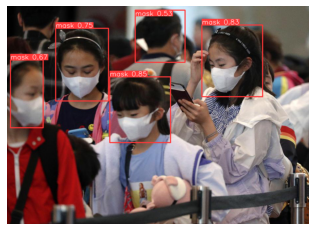

In [42]:
%matplotlib inline
from matplotlib.pyplot import imread,imshow,subplots,axis,title
# ir=plt.imread('~~imgName~~')
# title('~~Title~~') 
axis("Off")
imshow(results.imgs[0])

# 직접 바운딩박스 그리기

## 좌표값 확인

In [43]:
print('\n', results.xyxy[0][0])  # print img1 predictions


 tensor([311.67188, 214.55273, 495.38672, 413.99414,   0.84912,   0.00000], device='cuda:0')


## import 

In [44]:
%matplotlib inline
import imageio
import imgaug as ia
import pandas as pd

## original 이미지 확인

Original:


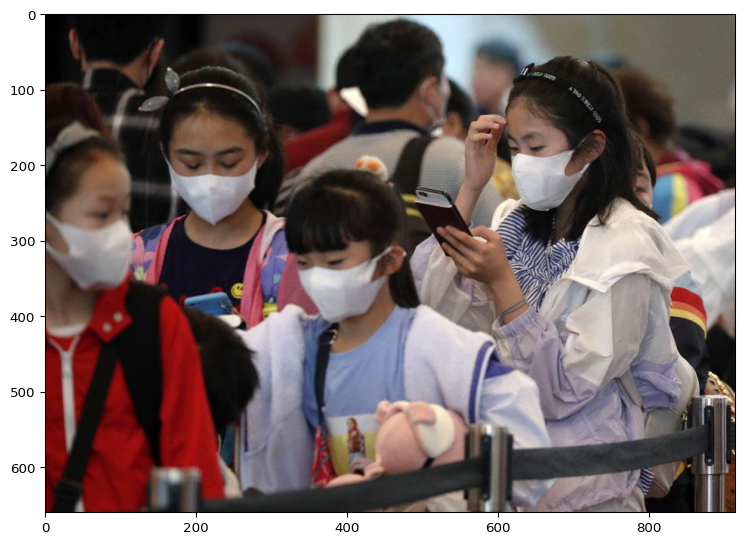

In [45]:
image = imageio.imread(testPath)

print("Original:")
ia.imshow(image)

## 바운딩박스를 그리는 함수 만들기

In [46]:

def bbsOnImage(img,bs):

    bbs = ia.BoundingBoxesOnImage(bs, shape=img.shape)

    image_with_bbs = bbs.draw_on_image(img)

    # image_with_bbs = ia.BoundingBox(
    #     x1=50.5, y1=10.5, x2=100.5, y2=16.5
    # ).draw_on_image(image_with_bbs, color=(255, 0, 0), size=3)
    return image_with_bbs

## 바운딩박스 그리기

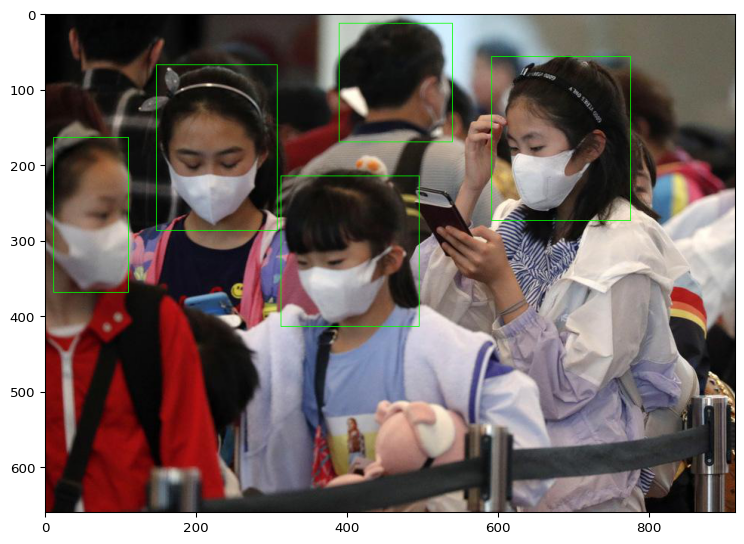

In [47]:
timage = image
for i in results.xyxy :
  for t in i :
    x1re = float(t[0])
    x2re = float(t[2])
    y1re = float(t[1])
    y2re = float(t[3])
    bs=[
      ia.BoundingBox(x1=x1re, y1=y1re, x2=x2re, y2=y2re)
    ]
    timage = bbsOnImage(timage,bs)
ia.imshow(timage)